In [61]:
import networkx as nx
import pandas as pd
import numpy as  np
import os
import matplotlib.pyplot as plt
import seaborn as sns



# Funciones Auxiliares

In [80]:
# Funciones auxiliares

def creacion_grafico_barra(df_edges,etiquetas,color):
    """
        Crea un gráfico de barras que representa la distribución de tipos de relaciones en un grafo.

        Parámetros:
        ----------- 
            df_edges : pandas.DataFrame
                Un DataFrame que contiene una columna llamada 'Relationship' donde se encuentran los valores codificados de las relaciones.
            
            color : str
                Un string que representa el color que se utilizará para las barras en el gráfico.

        Retorna:
        --------
            None
                La función no retorna ningún valor. Muestra el gráfico de barras directamente.
    """
    
    # Crear el gráfico de barras
    serie_count = df_edges["Relationship"].value_counts()
    # Crear el gráfico de barras
    ax = serie_count.plot(kind='bar', color=color, edgecolor='black')

    # Añadir etiquetas personalizadas para el eje X
    ax.set_xticklabels(etiquetas, rotation=0, fontsize=12)

    # Añadir etiquetas y título
    plt.xlabel('Tipo de Relación', fontsize=12)
    plt.ylabel('Cantidad', fontsize=12)
    plt.title('Distribución de Tipos de Relaciones', fontsize=14)

    # Mostrar el gráfico
    plt.tight_layout()  # Ajustar automáticamente los márgenes para evitar que las etiquetas se corten
    plt.show()

def graph_statistics(nx_graph):
    # Numero de nodos
    num_nodes = nx.number_of_nodes(nx_graph)
    # Numero de edges
    num_edges = nx.number_of_edges(nx_graph)
    # promedio grado de los nodos
    avg_degree = sum(dict(nx_graph.degree()).values()) / num_nodes
    # Densidad del grafo
    density = nx.density(nx_graph)
    clustering_coefficient = nx.average_clustering(nx_graph)
    diameter = nx.diameter(nx_graph)
    avg_path_length = nx.average_shortest_path_length(nx_graph)
    
    stats = {
        "Number of Nodes": num_nodes,
        "Number of Edges": num_edges,
        "Average Degree": avg_degree,
        "Density": density,
        "Clustering Coefficient": clustering_coefficient,
        "Diameter": diameter,
        "Average Path Length": avg_path_length,
    }
    print(stats)

def bar_plot_cat_attr(list_prefix_attr, df_nodes):
    """
    Crea un gráfico de barras para cada atributo categórico en la lista.
    Todos los gráficos se colocan en una sola figura.
    """
    #  TODO: Entender cosas que fueron copy paste
    # Obtener todas las columnas del DataFrame
    columns = df_nodes.columns

    # Determinar el número de subplots necesarios
    num_plots = len(list_prefix_attr)
    cols = 2  # Número de columnas de subplots
    rows = (num_plots + cols - 1) // cols  # Número de filas de subplots

    # Crear la figura y los ejes para los subplots
    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 5))
    # Usar una paleta de colores pastel
    pastel_colors = sns.color_palette("pastel", n_colors=num_plots)

    # Asegurarse de que 'axes' sea una lista plana para iterar fácilmente
    if num_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    # Filtrar las columnas y crear gráficos de barras en subplots
    for i, prefix in enumerate(list_prefix_attr):
        list_attr_cat = [col for col in columns if col.startswith(prefix)]

        # Filtrar el DataFrame para obtener solo las columnas seleccionadas
        features = df_nodes[list_attr_cat]

        # Contar la cantidad de 1s por cada columna seleccionada
        count_ones = features.sum()

        # Seleccionar el subplot correspondiente
        ax = axes[i]

        # Crear el gráfico de barras
        ax.bar(list_attr_cat, count_ones,color=pastel_colors[i % len(pastel_colors)])

        # Rotar las etiquetas del eje x para que sean verticales
        ax.set_xticklabels(list_attr_cat, rotation=90)

        # Etiquetas y título del gráfico
        ax.set_ylabel('Cantidad')
        ax.set_title(f'Cantidad de {prefix} por atributo')

    # Eliminar ejes vacíos si hay menos gráficos que subplots
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    # Ajustar espacio vertical entre subplots
    plt.subplots_adjust(hspace=2.3)
    # Ajustar el espaciado entre subplots
    plt.tight_layout()
    
    # Mostrar todos los gráficos en una figura
    plt.show()

def boxplots_attr(list_attr, df_nodes):
    """
    Crea gráficos de caja para varias columnas de un DataFrame, con títulos, etiquetas y colores personalizados.
    """
    # TODO: Entender cosas que fueron copy paste
    num_plots = len(list_attr)
    
    # Determinar el número de subplots necesarios
    cols = 2  # Número de columnas de subplots
    rows = (num_plots + cols - 1) // cols  # Número de filas de subplots

    # Crear la figura y los ejes para los subplots
    fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 5))
    
    # Asegurarse de que 'axes' sea una lista plana para iterar fácilmente
    if num_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten()


    for i, attr in enumerate(list_attr):
        ax = axes[i]
        
        # Crear el gráfico de caja para la columna actual
        df_nodes.boxplot(column=attr, ax=ax)
        
        # Configurar el título y la etiqueta del eje y
        title = attr
        ylabel = 'Values'
        
        ax.set_title(title)
        ax.set_ylabel(ylabel)
        ax.set_xticklabels([attr], rotation=90)

    # Eliminar ejes vacíos si hay menos gráficos que subplots
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    # Ajustar el espaciado entre subplots
    plt.tight_layout()
    
    # Mostrar todos los gráficos en una figura
    plt.show()

# Atributos y Nodos

In [24]:
path_nodes_features = "datasets/GNN_INTERNET_DATA/node_features.csv"

df_nodes = pd.read_csv(path_nodes_features)
print(f"[CANTIDAD EDGES]: {df_nodes['ASN'].count()}")
df_nodes.head()

[CANTIDAD EDGES]: 115577


,ASN,AS_rank_numberAsns,AS_rank_numberPrefixes,AS_rank_numberAddresses,AS_rank_total,AS_rank_customer,AS_rank_peer,AS_rank_provider,peeringDB_ix_count,peeringDB_fac_count,...,ASDB_C1L1_Health Care Services,ASDB_C1L1_Manufacturing,"ASDB_C1L1_Media, Publishing, and Broadcasting","ASDB_C1L1_Museums, Libraries, and Entertainment",ASDB_C1L1_None,ASDB_C1L1_Other,"ASDB_C1L1_Retail Stores, Wholesale, and E-commerce Sites",ASDB_C1L1_Service,ASDB_C1L1_Travel and Accommodation,ASDB_C1L1_Utilities (Excluding Internet Service)
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.108750,0.367823,0.456519,0.315402,0.183297,0.155328,0.489582,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.159316,0.453620,0.565342,0.346794,0.125120,0.246190,0.538821,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.000000,0.367307,0.676835,0.346794,0.000000,0.123095,0.631103,0.0,0.165327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.000000,0.281737,0.516589,0.261662,0.000000,0.000000,0.489582,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
column_names = df_nodes.columns
print(f"[CANTIDAD COLUMNAS] {len(column_names)}\n[COLUMN NAMES] {column_names}")

# 72 attr 

[CANTIDAD COLUMNAS] 73
[COLUMN NAMES] Index(['ASN', 'AS_rank_numberAsns', 'AS_rank_numberPrefixes',
       'AS_rank_numberAddresses', 'AS_rank_total', 'AS_rank_customer',
       'AS_rank_peer', 'AS_rank_provider', 'peeringDB_ix_count',
       'peeringDB_fac_count', 'AS_hegemony', 'cti_top', 'cti_origin',
       'AS_rank_continent_Africa', 'AS_rank_continent_Asia',
       'AS_rank_continent_Europe', 'AS_rank_continent_None',
       'AS_rank_continent_North America', 'AS_rank_continent_Oceania',
       'AS_rank_continent_South America', 'peeringDB_info_ratio_Balanced',
       'peeringDB_info_ratio_Heavy Inbound',
       'peeringDB_info_ratio_Heavy Outbound',
       'peeringDB_info_ratio_Mostly Inbound',
       'peeringDB_info_ratio_Mostly Outbound', 'peeringDB_info_ratio_None',
       'peeringDB_info_ratio_Not Disclosed', 'peeringDB_info_scope_Africa',
       'peeringDB_info_scope_Asia Pacific', 'peeringDB_info_scope_Australia',
       'peeringDB_info_scope_Europe', 'peeringDB_info_scope

In [26]:
missing_data = df_nodes.isnull().sum().sum()
print(missing_data)

3647512


In [27]:
null_check = df_nodes.isnull().any()

# Mostrar las columnas que tienen valores nulos (si las hay)
print("Columnas con valores nulos:")
print(null_check[null_check == True])

# Llenamos los na con 0
df_nodes = df_nodes.fillna(0)

Columnas con valores nulos:
AS_rank_numberAsns                                          True
AS_rank_numberPrefixes                                      True
AS_rank_numberAddresses                                     True
AS_rank_total                                               True
AS_rank_customer                                            True
                                                            ... 
ASDB_C1L1_Other                                             True
ASDB_C1L1_Retail Stores, Wholesale, and E-commerce Sites    True
ASDB_C1L1_Service                                           True
ASDB_C1L1_Travel and Accommodation                          True
ASDB_C1L1_Utilities (Excluding Internet Service)            True
Length: 72, dtype: bool


In [28]:
# Para feat no categoricos ver % de 0s 

# Obtener los nombres de las columnas relevantes (feat no categoricos)
column_names = df_nodes.columns[1:12]  # columnas a analizar están a partir del índice 1, 0 corresponde al ASN

# Contar el total de nodos
total = len(df_nodes)

# Lista con los nombre de columnas que tengan un % alto de 0
list_feats_zeros = []
# Analizar por columna
print("Análisis de valores 0 | Nan en feats:")
for i, name in enumerate(column_names):
    # Contar 0 en columna/feat
    count_zeros = (df_nodes[name] == 0).sum()
    
    # Calcular el porcentaje de ceros
    percentage_zeros = (count_zeros / total) * 100

    if percentage_zeros >= 50:
        list_feats_zeros.append(name)
    
    # Mostrar el resultado
    print(f"[NOMBRE FEATURE]: {name}")
    print(f"[PORCENTAJE DE 0]: {percentage_zeros:.2f}%")
    print(f"[CANTIDAD DE NODOS CON VALOR 0]: {count_zeros}")
    print(f"[TOTAL DE NODOS]: {total}")
    print("-" * 40)  # Línea separadora para mejor legibilidad

print(f"[LISTA] {list_feats_zeros}")

Análisis de valores 0 | Nan en feats:
[NOMBRE FEATURE]: AS_rank_numberAsns
[PORCENTAJE DE 0]: 90.16%
[CANTIDAD DE NODOS CON VALOR 0]: 104204
[TOTAL DE NODOS]: 115577
----------------------------------------
[NOMBRE FEATURE]: AS_rank_numberPrefixes
[PORCENTAJE DE 0]: 35.45%
[CANTIDAD DE NODOS CON VALOR 0]: 40971
[TOTAL DE NODOS]: 115577
----------------------------------------
[NOMBRE FEATURE]: AS_rank_numberAddresses
[PORCENTAJE DE 0]: 35.45%
[CANTIDAD DE NODOS CON VALOR 0]: 40971
[TOTAL DE NODOS]: 115577
----------------------------------------
[NOMBRE FEATURE]: AS_rank_total
[PORCENTAJE DE 0]: 35.93%
[CANTIDAD DE NODOS CON VALOR 0]: 41528
[TOTAL DE NODOS]: 115577
----------------------------------------
[NOMBRE FEATURE]: AS_rank_customer
[PORCENTAJE DE 0]: 90.14%
[CANTIDAD DE NODOS CON VALOR 0]: 104176
[TOTAL DE NODOS]: 115577
----------------------------------------
[NOMBRE FEATURE]: AS_rank_peer
[PORCENTAJE DE 0]: 88.52%
[CANTIDAD DE NODOS CON VALOR 0]: 102313
[TOTAL DE NODOS]: 115

C:\Users\Vale\AppData\Local\Temp\ipykernel_9248\1487170650.py:103: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list_attr_cat, rotation=90)
C:\Users\Vale\AppData\Local\Temp\ipykernel_9248\1487170650.py:103: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list_attr_cat, rotation=90)
C:\Users\Vale\AppData\Local\Temp\ipykernel_9248\1487170650.py:103: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list_attr_cat, rotation=90)
C:\Users\Vale\AppData\Local\Temp\ipykernel_9248\1487170650.py:103: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(list_attr_cat, rotation=90)
C:\Users\Vale\AppData\Lo

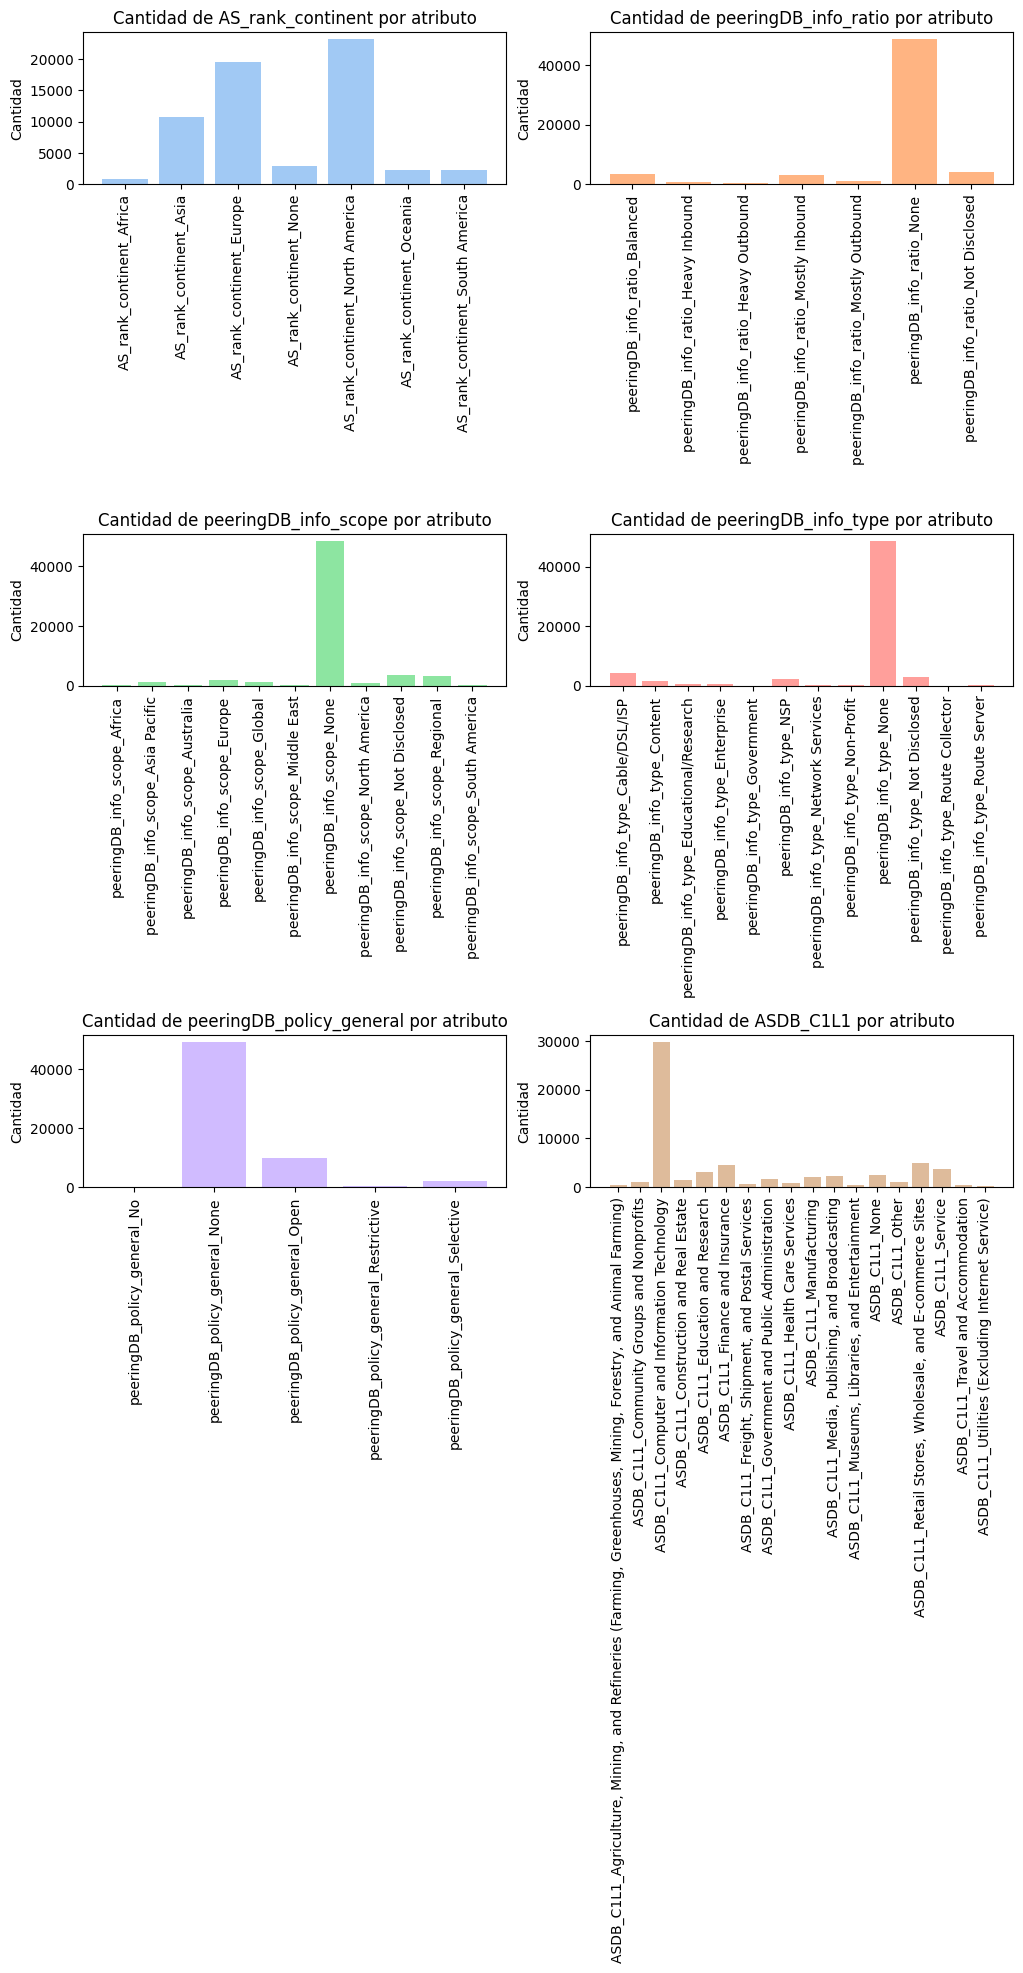

In [71]:
list_attr = ["AS_rank_continent","peeringDB_info_ratio","peeringDB_info_scope","peeringDB_info_type","peeringDB_policy_general","ASDB_C1L1"]
bar_plot_cat_attr(list_attr,df_nodes)

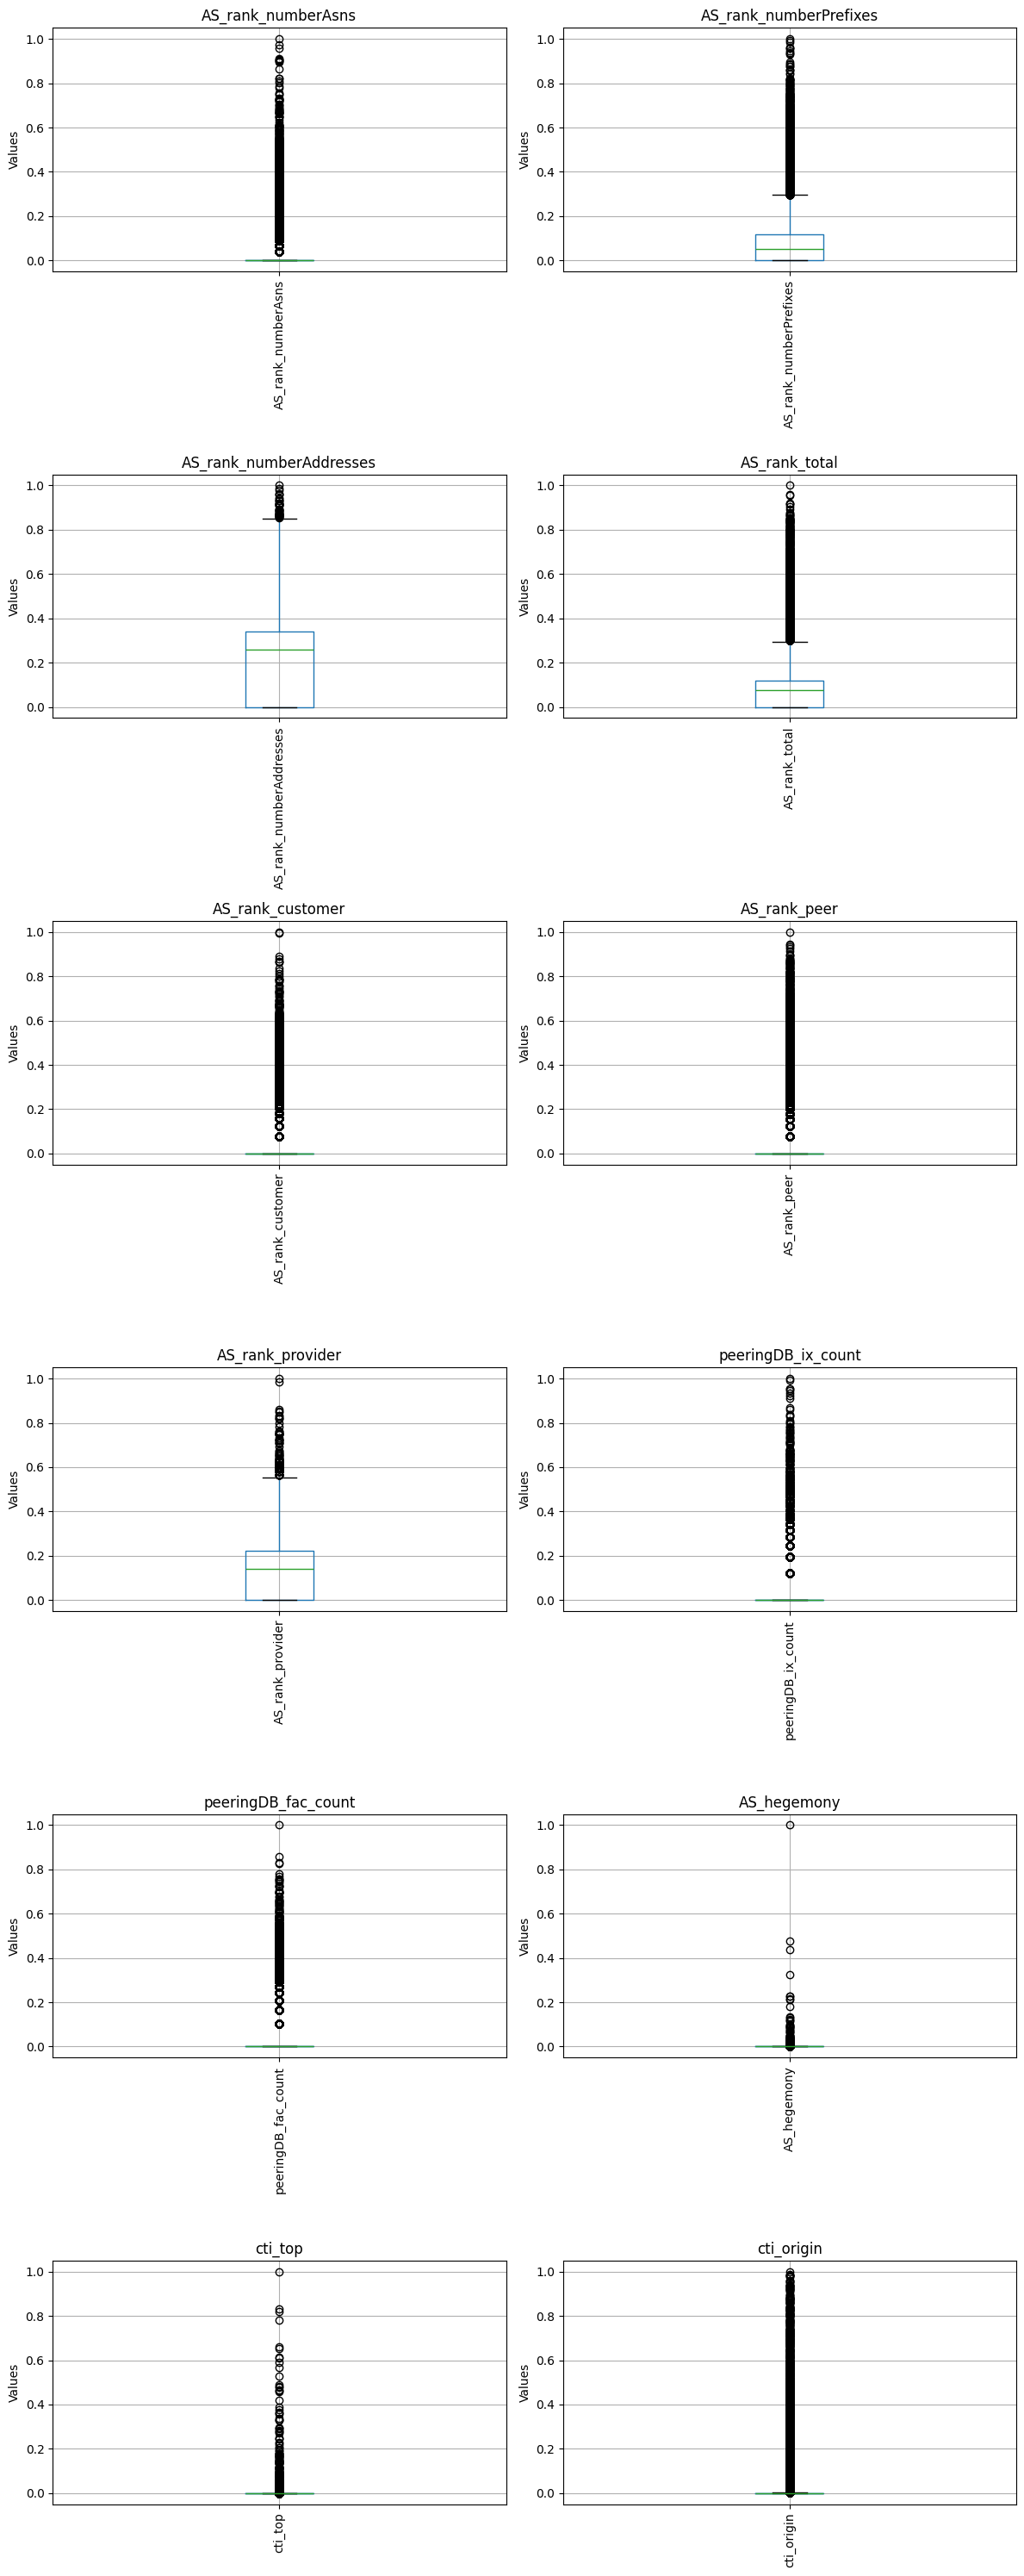

In [81]:
list_attr_no_cat = ['AS_rank_numberAsns', 'AS_rank_numberPrefixes','AS_rank_numberAddresses', 'AS_rank_total', 'AS_rank_customer','AS_rank_peer', 'AS_rank_provider', 'peeringDB_ix_count','peeringDB_fac_count', 'AS_hegemony', 'cti_top', 'cti_origin']
boxplots_attr(list_attr_no_cat,df_nodes)

## Route Collectors

In [29]:
route_collectors_list = df_nodes[df_nodes['peeringDB_info_type_Route Collector'] == 1]['ASN'].tolist()

print(f"[CANTIDAD COLLECTORS] {len(route_collectors_list)}")
print(f"[ASN COLLECTORS] {route_collectors_list}\n")

# Seleccionar las columnas desde la columna 13 en adelante
categoical_attr = df_nodes.columns[13:]

# Iterar sobre cada ASN en route_collectors_list
for asn in route_collectors_list:
    # Filtrar la fila correspondiente al ASN actual
    collector_row = df_nodes[df_nodes['ASN'] == asn]
    
    # Obtener las columnas con valor 1 desde la columna 13 en adelante
    active_columns = categoical_attr[collector_row[categoical_attr].iloc[0] == 1].tolist()
    
    # Mostrar los resultados
    print(f"[ASN] {asn}")
    print(f"[COLUMNAS CON VALOR 1] {active_columns}")
    print("-" * 40)


[CANTIDAD COLLECTORS] 11
[ASN COLLECTORS] [1965, 7937, 25445, 28861, 33234, 34399, 38137, 48219, 52992, 56304, 58332]

[ASN] 1965
[COLUMNAS CON VALOR 1] ['AS_rank_continent_Europe', 'peeringDB_info_ratio_Balanced', 'peeringDB_info_scope_Regional', 'peeringDB_info_type_Route Collector', 'peeringDB_policy_general_Open', 'ASDB_C1L1_Computer and Information Technology']
----------------------------------------
[ASN] 7937
[COLUMNAS CON VALOR 1] ['AS_rank_continent_Europe', 'peeringDB_info_ratio_Balanced', 'peeringDB_info_scope_Regional', 'peeringDB_info_type_Route Collector', 'peeringDB_policy_general_Open', 'ASDB_C1L1_Service']
----------------------------------------
[ASN] 25445
[COLUMNAS CON VALOR 1] ['AS_rank_continent_North America', 'peeringDB_info_ratio_Not Disclosed', 'peeringDB_info_scope_Not Disclosed', 'peeringDB_info_type_Route Collector', 'peeringDB_policy_general_Open', 'ASDB_C1L1_Computer and Information Technology']
----------------------------------------
[ASN] 28861
[COLUM

## Route Server

In [30]:
route_servers_list = df_nodes[df_nodes['peeringDB_info_type_Route Server'] == 1]['ASN'].tolist()

print(f"[CANTIDAD COLLECTORS] {len(route_servers_list)}")
print(f"[ASN COLLECTORS] {route_servers_list}")



[CANTIDAD COLLECTORS] 336
[ASN COLLECTORS] [885, 1156, 4382, 4400, 4417, 4880, 5162, 5248, 6223, 6389, 6454, 6547, 7121, 7237, 7253, 7347, 7357, 8056, 8096, 8101, 8121, 8162, 8224, 8468, 8958, 9137, 9143, 9526, 9782, 11042, 12062, 12242, 12615, 12756, 12844, 13360, 13496, 13754, 14620, 14636, 14697, 15171, 15190, 15970, 16251, 16781, 16822, 17158, 17419, 17559, 17566, 17977, 18730, 19242, 19373, 19374, 19399, 19674, 20926, 21106, 21490, 21591, 21740, 22093, 22232, 22316, 22379, 22446, 22481, 22511, 22531, 22609, 22640, 22803, 22872, 22885, 22922, 22934, 23127, 23129, 23390, 23457, 23565, 24343, 24355, 24445, 24447, 24479, 24566, 24569, 24737, 24799, 25459, 25576, 26096, 26511, 26713, 27438, 27593, 27687, 28161, 28216, 28272, 28836, 28888, 28902, 29178, 29304, 29733, 29846, 30637, 30844, 31016, 31230, 31300, 31705, 31766, 32471, 32472, 32630, 32950, 33008, 33132, 33214, 33632, 33673, 33754, 34092, 34209, 34306, 34432, 34454, 34484, 34506, 34554, 34636, 34775, 34816, 34819, 34820, 34821,

# Edges Grafo Dirigido 

In [31]:
path_edges_DiGraph = "datasets/DGL_Graph/MYCODEDiGraph/edges.csv"

df_edges_DiGraph = pd.read_csv(path_edges_DiGraph)
print(f"[CANTIDAD EDGES]: {df_edges_DiGraph['Relationship'].count()}")
df_edges_DiGraph.head()

[CANTIDAD EDGES]: 433979


,src_id,dst_id,Relationship
0,1,7843,0
1,1,11537,0
2,1,37157,0
3,1,50377,1
4,1,51728,0


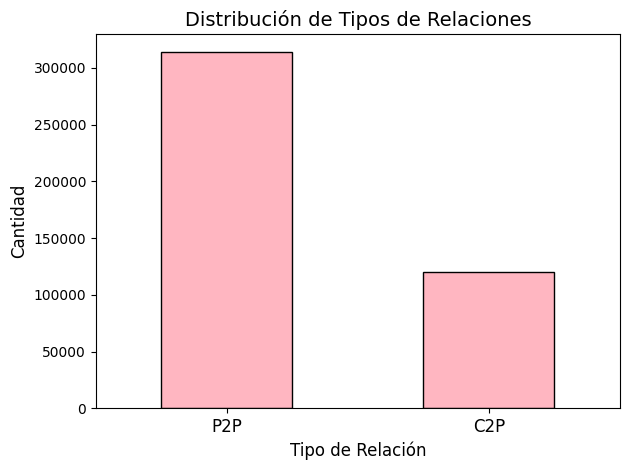

In [32]:
creacion_grafico_barra(df_edges_DiGraph,["P2P", "C2P"],'#FFB6C1')

# Edges Multi Grafo Dirigido




In [33]:
path_edges_MultiDiGraph = "datasets/DGL_Graph/MYCODEMultiDiGraph/edges.csv"

df_edges_MultiDiGraph = pd.read_csv(path_edges_MultiDiGraph)
print(f"[CANTIDAD EDGES]: {df_edges_MultiDiGraph['Relationship'].count()}")
df_edges_MultiDiGraph.head()

[CANTIDAD EDGES]: 923778


,src_id,dst_id,Relationship
0,1,7843,0
1,1,11537,0
2,1,37157,0
3,1,50377,1
4,1,51728,0


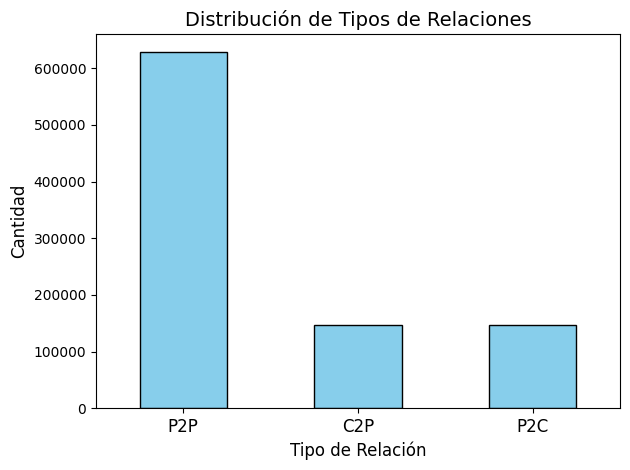

In [34]:
creacion_grafico_barra(df_edges_MultiDiGraph,['P2P', 'C2P', 'P2C'],"skyblue")

# Grafo Dirigido 

In [45]:
# path_edges_DiGraph = "datasets/DGL_Graph/MYCODEDiGraph/edges.csv"

di_graph = nx.read_edgelist(path_edges_DiGraph, delimiter=',', nodetype=int, comments='src_id,dst_id')
graph_statistics(di_graph)



TypeError: Failed to convert edge data (['0']) to dictionary.

# Multi Grafo Dirigido 

In [ ]:
# path_edges_MultiDiGraph = "datasets/DGL_Graph/MYCODEMultiDiGraph/edges.csv"

multi_di_graph = nx.read_edgelist(path_edges_MultiDiGraph, delimiter=',', nodetype=int, comments='src_id,dst_id')
graph_statistics(multi_di_graph)

In [37]:

install.packages("ggplot2") 


NameError: name 'install' is not defined

In [36]:
install.packages("ggplot2") 
library(ggplot2) 
library(tidyverse) 

NameError: name 'install' is not defined